In [13]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [14]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [15]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

IEX_TOKEN = os.getenv("IEX_SECRET")

weights = [.6,.4]

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [16]:
list_of_tickers = ["SPY", "AGG"]

end_date = datetime.now()
start_date = end_date + timedelta(-365)


dataframe_spy = get_historical_data(list_of_tickers[0], start_date, end_date,  output_format='pandas', token = IEX_TOKEN)
dataframe_spy.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
dataframe_spy.columns = ["SPY"]
spy_returns = dataframe_spy.pct_change()
spy_returns.dropna(inplace=True)
spy_returns.head()


,SPY
date,
2018-10-02,-0.000583
2018-10-03,0.000549
2018-10-04,-0.007816
2018-10-05,-0.005597
2018-10-08,0.000000


In [17]:
dataframe_agg = get_historical_data(list_of_tickers[1], start_date, end_date,  output_format='pandas', token = IEX_TOKEN)
dataframe_agg.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
dataframe_agg.columns = ["AGG"]
agg_returns = dataframe_agg.pct_change()
agg_returns.dropna(inplace=True)
agg_returns.head()

,AGG
date,
2018-10-02,0.001140
2018-10-03,-0.004746
2018-10-04,-0.002861
2018-10-05,-0.002200
2018-10-08,-0.000383


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [18]:
# Calculate the daily roi for the stocks
port_returns = pd.concat([spy_returns,agg_returns], axis="columns", join="inner")


port_returns.head()

,SPY,AGG
date,,
2018-10-02,-0.000583,0.001140
2018-10-03,0.000549,-0.004746
2018-10-04,-0.007816,-0.002861
2018-10-05,-0.005597,-0.002200
2018-10-08,0.000000,-0.000383


In [19]:
port_stocks_returns = port_returns.dot(weights)
port_stocks_returns.head()

date
2018-10-02    0.000106
2018-10-03   -0.001569
2018-10-04   -0.005834
2018-10-05   -0.004238
2018-10-08   -0.000153
dtype: float64

In [20]:
# Calculate volatility
port_std = port_stocks_returns.std()
annual_port_std = port_std
annual_port_std

0.0062196226789254135

In [21]:
avg_port_returns = port_stocks_returns.mean()
avg_port_returns

0.000181031031745252

In [22]:
# Save the last day's closing price
spy_last = dataframe_spy.iloc[-1]['SPY']
agg_last = dataframe_agg.iloc[-1]['AGG']

port_last = (spy_last *.6) + (agg_last * .4)

port_last

222.49599999999998

In [23]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 30
monte_carlo = pd.DataFrame()



In [24]:
# Run the Monte Carlo Simulation


for x in range(number_simulations):
    simulated_prices = [port_last]

    for i in range(number_records):
        simulated_price = simulated_prices[-1] * (1 + np.random.normal(avg_port_returns, annual_port_std))
        simulated_prices.append(simulated_price)
    monte_carlo[f" Simulation {x+1}"] = pd.Series(simulated_prices)
 
# Print head of DataFrame

monte_carlo.head()



,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 91,Simulation 92,Simulation 93,Simulation 94,Simulation 95,Simulation 96,Simulation 97,Simulation 98,Simulation 99,Simulation 100
0,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,...,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000,222.496000
1,223.223652,220.415288,221.110791,221.249408,220.470763,222.214795,222.016863,220.435296,223.446613,223.000041,...,223.493149,223.863021,223.986724,219.637230,222.169635,225.250095,222.939388,220.701530,222.405373,224.508796
2,223.072101,218.908005,221.352472,219.603789,220.319564,221.473933,223.528246,220.454129,226.608364,223.439344,...,225.082739,224.869074,222.326297,218.816362,222.906010,225.793609,220.905428,219.349642,224.681414,224.202140
3,224.011103,220.271641,222.208284,218.832638,219.767975,219.321922,223.616498,219.029863,227.638432,222.482926,...,225.695049,221.482270,222.845958,218.304409,224.236269,225.394515,220.410868,220.635221,223.232304,223.281732
4,226.173639,221.507241,223.119352,218.973669,221.101224,216.784348,220.877991,219.244526,226.624618,224.179968,...,226.190446,222.348923,222.770157,217.651756,226.165350,226.939154,221.184228,220.752623,223.680254,223.116978


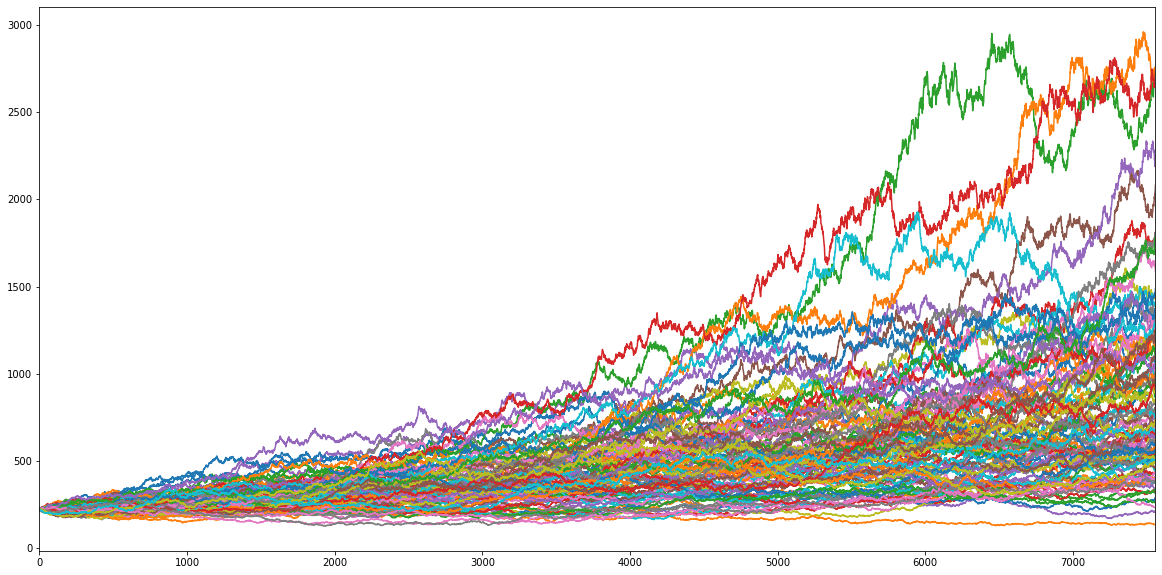

In [25]:
# Visualize the Simulation
monte_carlo.plot(figsize = (20,10), legend = False)

In [26]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
simulated_ending_prices = monte_carlo.iloc[-1, :]
simulated_ending_prices.head()

 Simulation 1     574.908925
 Simulation 2    1148.054455
 Simulation 3     865.715356
 Simulation 4     541.556001
 Simulation 5     332.572850
Name: 7560, dtype: float64

In [27]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
simulated_ending_prices_twenty = monte_carlo.iloc[5039, :]
simulated_ending_prices_twenty.head()

 Simulation 1    617.640738
 Simulation 2    440.487939
 Simulation 3    842.920946
 Simulation 4    510.287917
 Simulation 5    293.866660
Name: 5039, dtype: float64

In [28]:
# Display the 90% confidence interval for the ending returns
confidence_interval = simulated_ending_prices.quantile(q=[0.05, 0.95])
confidence_interval




0.05     320.527724
0.95    1805.330367
Name: 7560, dtype: float64

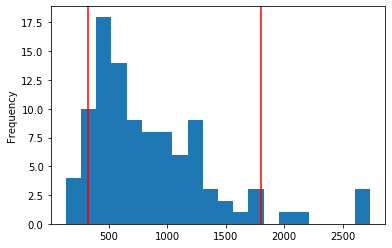

In [29]:
# Visualize the distribution of the ending returns
plt.figure();
simulated_ending_prices.plot(kind='hist', bins=20)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [30]:
# See Below

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [32]:
initial_investment = 20000

other_intervals =  simulated_ending_prices.quantile(q=[0.10,0.50,0.90])

cumulative_pnl_lower_bound = initial_investment * ((other_intervals.iloc[0] - port_last) / port_last)
cumulative_pnl_upper_bound = initial_investment * ((other_intervals.iloc[2] - port_last) / port_last)
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound



cumulative_pnl_middle = initial_investment * ((other_intervals.iloc[1] - port_last) / port_last)
ending_investment_middle = initial_investment + cumulative_pnl_middle

print("The expected returns in dollars for 10th 50th and 90th percentiles are below:")
print(ending_investment_lower_bound)
print(ending_investment_middle)
print(ending_investment_upper_bound)

The expected returns in dollars for 10th 50th and 90th percentiles are below:
34252.529260244824
62263.752023866495
129592.17600544966


In [34]:
print("Expected returns 10th 50th and 90th percentiles in percentage are below")
print(f'{((other_intervals.iloc[0] - port_last) / port_last)}')
print(((other_intervals.iloc[1] - port_last) / port_last))
print(((other_intervals.iloc[2] - port_last) / port_last))



Expected returns 10th 50th and 90th percentiles in percentage are below
0.7126264630122412
2.113187601193325
5.479608800272483


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [35]:
ending_investment_lower_bound * .04

1370.101170409793

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [37]:
initial_investment2 = 30000

other_intervals =  simulated_ending_prices.quantile(q=[0.10,0.50,0.90])

cumulative_pnl_lower_bound2 = initial_investment2 * ((other_intervals.iloc[0] - port_last) / port_last)
cumulative_pnl_upper_bound2 = initial_investment2 * ((other_intervals.iloc[2] - port_last) / port_last)
ending_investment_lower_bound2 = initial_investment2 + cumulative_pnl_lower_bound2
ending_investment_upper_bound2 = initial_investment2 + cumulative_pnl_upper_bound2



cumulative_pnl_middle2 = initial_investment2 * ((other_intervals.iloc[1] - port_last) / port_last)
ending_investment_middle2 = initial_investment2 + cumulative_pnl_middle2

print("The expected returns in dollars for 10th 50th and 90th percentiles are below:")
print(ending_investment_lower_bound2)
print(ending_investment_middle2)
print(ending_investment_upper_bound2)


The expected returns in dollars for 10th 50th and 90th percentiles are below:
51378.79389036723
93395.62803579975
194388.26400817448


In [38]:
ending_investment_lower_bound2 * .04

2055.151755614689

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE